In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
digits = load_digits()

In [3]:
digits.target.shape

(1797,)

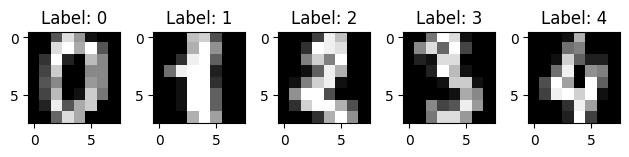

In [4]:
fig, axes = plt.subplots(1, 5)

# Loop through the first 5 images and labels
for index, (image, label) in enumerate(zip(digits.images[:5], digits.target[:5])):
    # Display the image in a subplot
    axes[index].imshow(image, cmap=plt.cm.gray)
    axes[index].set_title(f"Label: {label}")

# Adjust subplot layout and display
plt.tight_layout()
plt.show()

In [5]:
x_train,x_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size = 0.25,random_state=0)

In [6]:
x_train.shape

(1347, 64)

In [7]:
Loreg = LogisticRegression(max_iter=2000)
Loreg.fit(x_train,y_train)

LogisticRegression(max_iter=2000)

In [8]:
predictions = Loreg.predict(x_test)

In [9]:
cm = metrics.confusion_matrix(y_test,predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  1  0 43  0]
 [ 0  0  0  0  0  1  0  0  2 44]]


<Axes: >

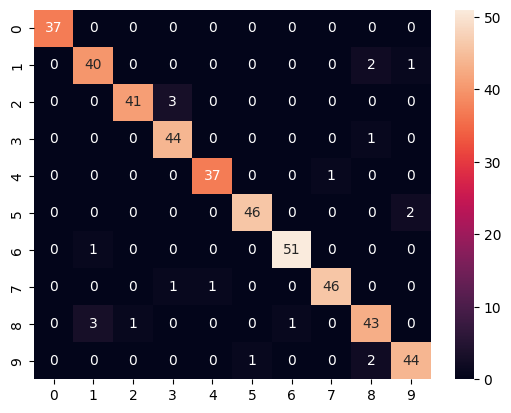

In [10]:
sns.heatmap(cm,annot=True)

In [11]:
score = Loreg.score(x_test,y_test)
print(score)

0.9533333333333334
